C:\Users\xiaoy\AppData\Local\Temp\ipykernel_19508\4197207104.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(platforms_calculated, rotation=45)


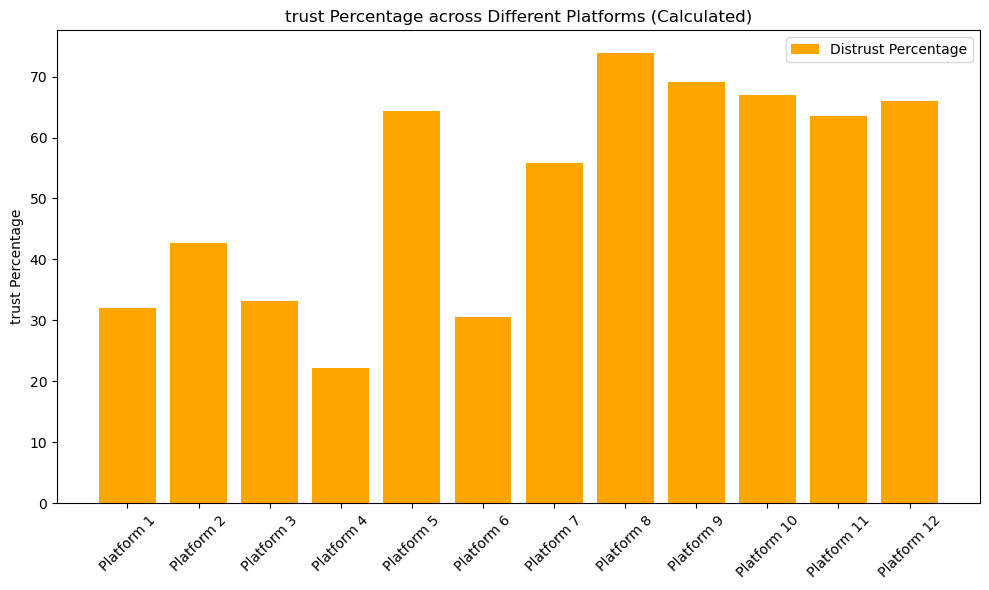

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_reloaded = pd.read_csv('Media Habits in the 21st Century_February 12, 2024_07.30.csv', skiprows=[1])

trust_columns = [col for col in df_reloaded.columns if col.startswith('Q5') and not col.endswith('TEXT')]


for col in trust_columns:
    df_reloaded[col] = df_reloaded[col].str.extract('(\d)').astype(float)



# Simplifying by directly calculating distrust percentages without detailed usage score handling due to previous issues
average_trust = df_reloaded[trust_columns].mean()
distrust_percentage = average_trust * 25 


platforms_calculated = [f"Platform {i+1}" for i in range(len(distrust_percentage))]


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(platforms_calculated, distrust_percentage, color='orange', label='Distrust Percentage')
ax.set_ylabel('trust Percentage')
ax.set_title('trust Percentage across Different Platforms (Calculated)')
ax.set_xticklabels(platforms_calculated, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()



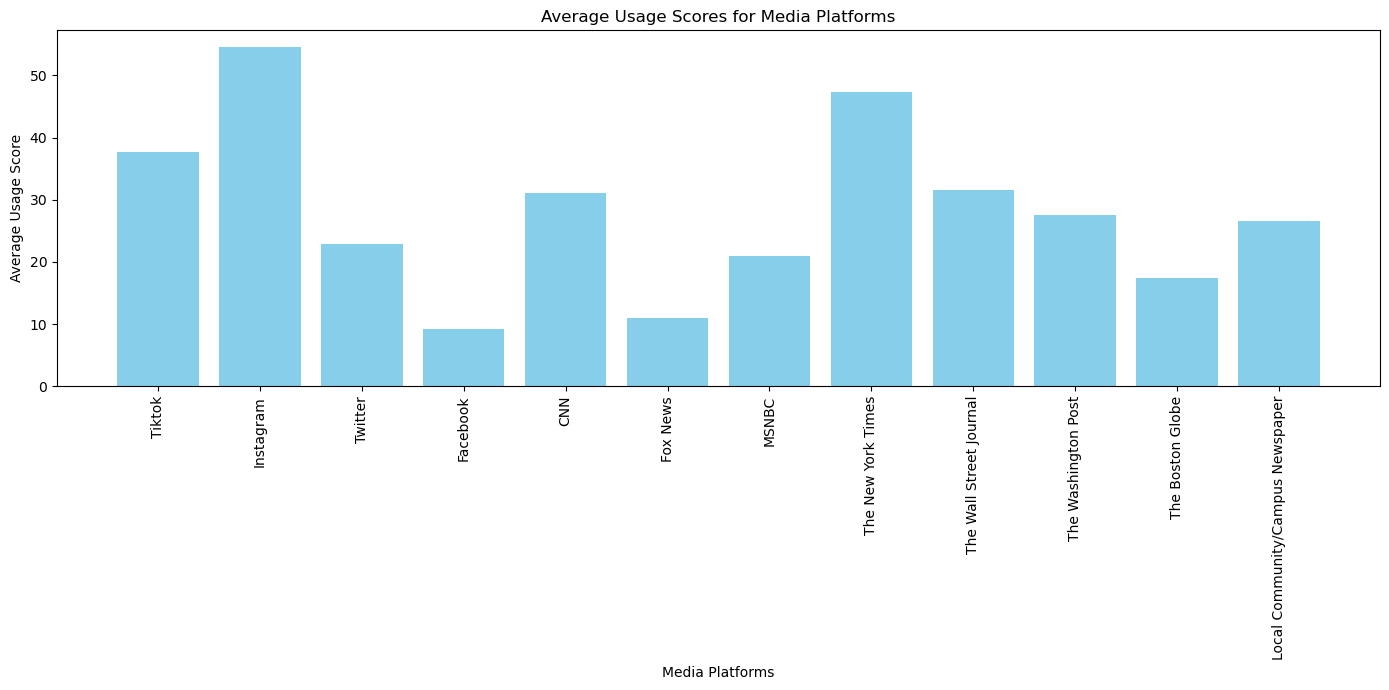

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df_usage = pd.read_csv('Media Habits in the 21st Century_February 12, 2024_07.30.csv', skiprows=2)


usage_columns_corrected = [col for col in df_usage.columns if "QID4" in col]

# Convert all columns to numeric, assuming non-response as 'never' which corresponds to 0
for col in usage_columns_corrected:
    df_usage[col] = pd.to_numeric(df_usage[col], errors='coerce').fillna(0)

# Calculate the average usage for each platform
average_usage_scores = df_usage[usage_columns_corrected].mean()*20
media_platforms = [
    'Tiktok', 'Instagram', 'Twitter', 'Facebook',
    'CNN', 'Fox News', 'MSNBC', 'The New York Times',
    'The Wall Street Journal', 'The Washington Post',
    'The Boston Globe', 'Local Community/Campus Newspaper'
]

# Visualization of the average usage scores
plt.figure(figsize=(14, 7))
plt.bar(media_platforms, average_usage_scores, color='skyblue')
plt.title('Average Usage Scores for Media Platforms')
plt.xlabel('Media Platforms')
plt.ylabel('Average Usage Score')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()


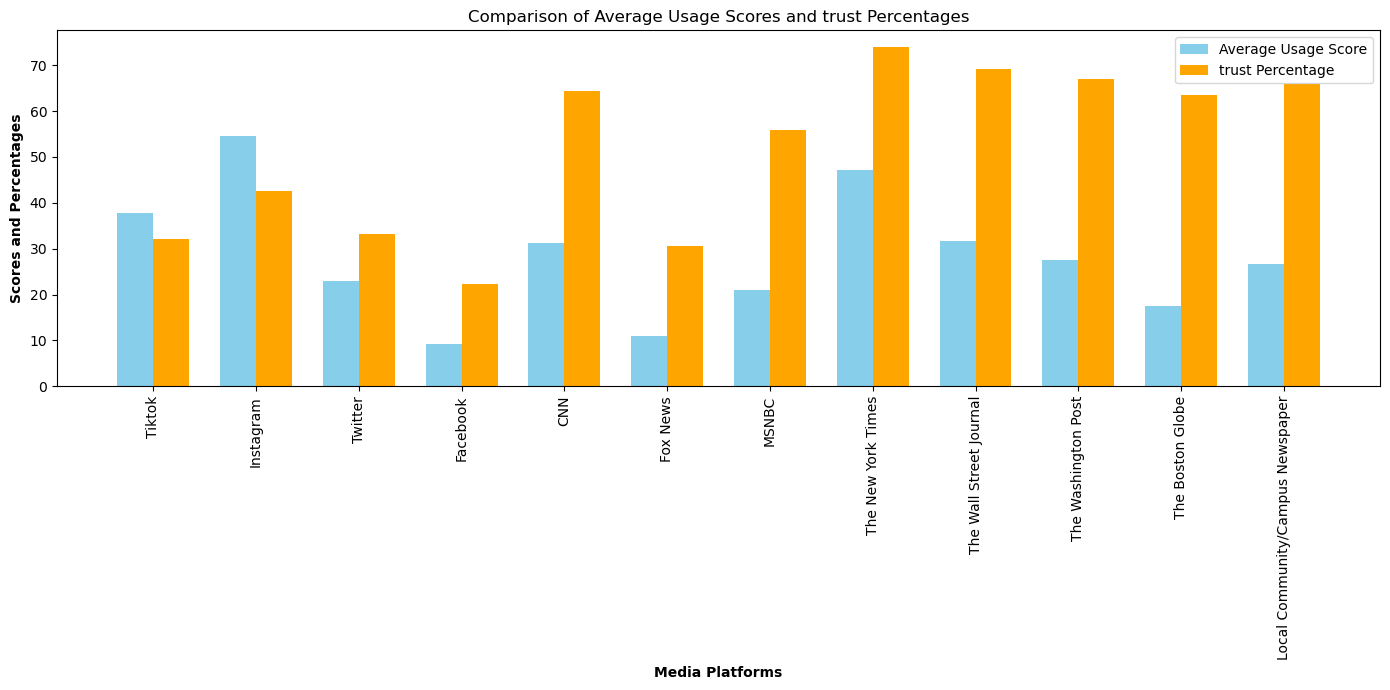

In [3]:
# To create a side-by-side bar chart comparing average usage scores and distrust percentages for each platform
import numpy as np

# Creating an array for the positions of the bars on the x-axis
barWidth = 0.35
r1 = np.arange(len(average_usage_scores))
r2 = [x + barWidth for x in r1]

# Creating the bar chart
fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(r1, average_usage_scores, color='skyblue', width=barWidth, label='Average Usage Score')
bars2 = ax.bar(r2, distrust_percentage.values, color='orange', width=barWidth, label='trust Percentage')

# Adding labels, title, and legend
ax.set_xlabel('Media Platforms', fontweight='bold')
ax.set_ylabel('Scores and Percentages', fontweight='bold')
ax.set_title('Comparison of Average Usage Scores and trust Percentages')
ax.set_xticks([r + barWidth / 2 for r in range(len(average_usage_scores))])
ax.set_xticklabels(media_platforms, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()



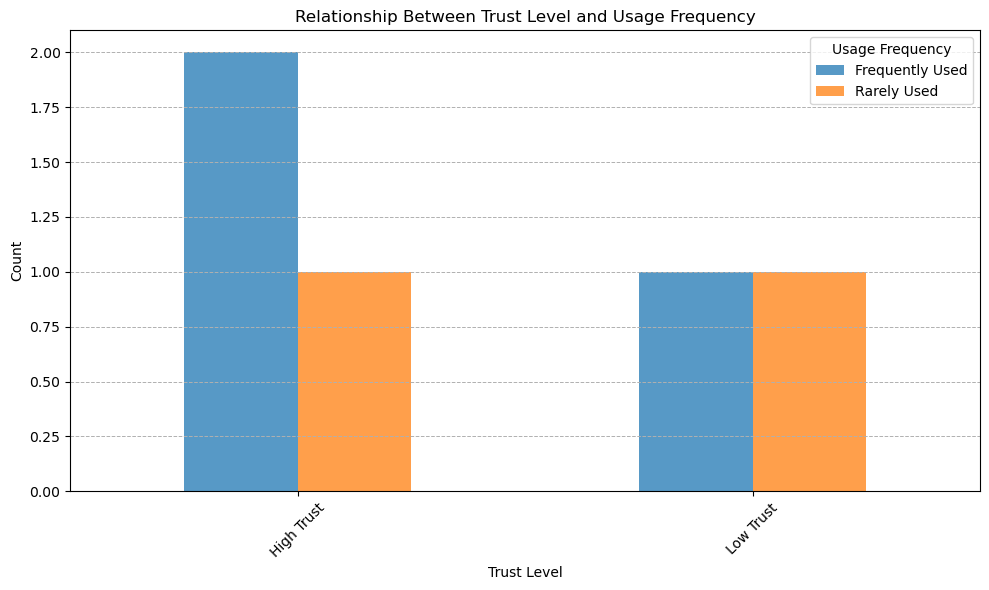

In [4]:
import matplotlib.pyplot as plt
# Hypothetical data creation based on trust and usage categories
import numpy as np
import pandas as pd

# Example data: Platform categories by Trust and Usage Frequency
data = {
    'Platform': ['Platform 1', 'Platform 2', 'Platform 3', 'Platform 4', 'Platform 5'],
    'Trust Level': ['High Trust', 'Low Trust', 'High Trust', 'Low Trust', 'High Trust'],
    'Usage Frequency': ['Frequently Used', 'Rarely Used', 'Rarely Used', 'Frequently Used', 'Frequently Used']
}

df_example = pd.DataFrame(data)

# Perform Cross-Tabulation between Trust Level and Usage Frequency
cross_tab_result = pd.crosstab(df_example['Trust Level'], df_example['Usage Frequency'])


# Visualization of the Cross-Tabulation result
cross_tab_result.plot(kind='bar', figsize=(10, 6), alpha=0.75, rot=0)
plt.title('Relationship Between Trust Level and Usage Frequency')
plt.xlabel('Trust Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Usage Frequency')
plt.tight_layout()

# Display the plot
plt.show()


In [11]:
# Since we encountered issues with usage scores, let's focus on visualizing the trust scores for now.
# Define the columns for trust and usage scores based on the specified ranges and platforms
platforms_ordered = [
    'TikTok', 'Instagram', 'Twitter', 'Facebook',
    'CNN', 'Fox News', 'MSNBC', 'The New York Times',
    'The Wall Street Journal', 'The Washington Post',
    'The Boston Globe', 'Local Community/Campus Newspaper'
]

# Categorize platforms into social media and traditional news
social_media_indices = [0, 1, 2, 3, 4]  # Including Fox News as per user categorization
traditional_news_indices = [5, 6, 7, 8, 9, 10, 11]


usage_scores = df_reloaded[[f'Q4_{i+1}' for i in range(12)]].mean() * 20  
trust_scores = df_reloaded[[f'Q5_{i+1}' for i in range(12)]].mean()


avg_usage_social_media = df_reloaded[[f'Q4_{i+1}' for i in social_media_indices]].mean(axis=1).mean() * 20
avg_trust_social_media = df_reloaded[[f'Q5_{i+1}' for i in social_media_indices]].mean(axis=1).mean()

# Calculate average usage and trust scores for traditional news
avg_usage_traditional_news = df_reloaded[[f'Q4_{i+1}' for i in traditional_news_indices]].mean(axis=1).mean() * 20
avg_trust_traditional_news = df_reloaded[[f'Q5_{i+1}' for i in traditional_news_indices]].mean(axis=1).mean()

avg_usage_social_media, avg_trust_social_media, avg_usage_traditional_news, avg_trust_traditional_news








(34.427350427350426, 1.5547008547008547, 28.99014778325123, 2.4328817733990147)

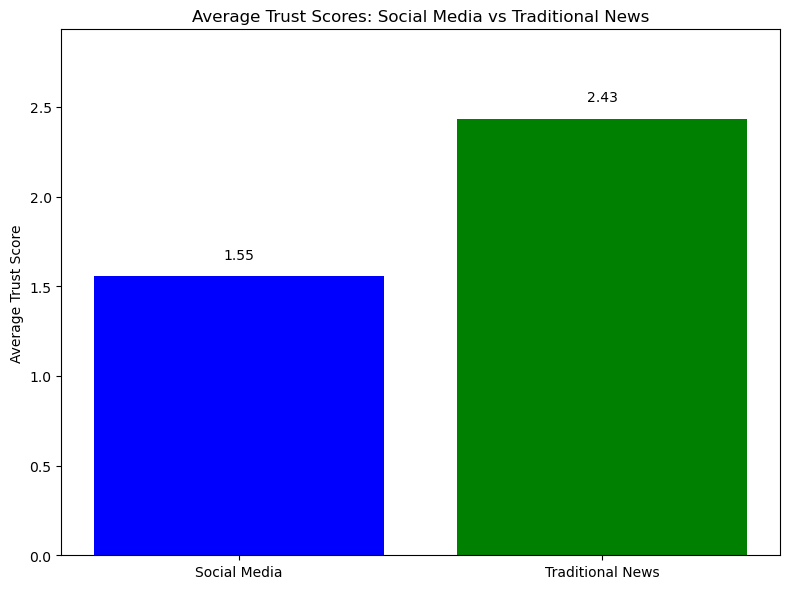

In [12]:
import matplotlib.pyplot as plt

# Data for visualization
categories = ['Social Media', 'Traditional News']
trust_scores = [avg_trust_social_media, avg_trust_traditional_news]

# Creating the bar chart for trust scores
plt.figure(figsize=(8, 6))
plt.bar(categories, trust_scores, color=['blue', 'green'])
plt.title('Average Trust Scores: Social Media vs Traditional News')
plt.ylabel('Average Trust Score')
plt.ylim(0, max(trust_scores) + 0.5)  # Adjusting ylim to add some space above the highest bar

# Adding text labels above bars
for i, score in enumerate(trust_scores):
    plt.text(i, score + 0.1, f'{score:.2f}', ha='center')

plt.tight_layout()
plt.show()